# Abstract

This study focuses on using linear regression to forecast house prices in Jakarta and Tebet, Indonesia. After analyzing the data, we obtained a prediction accuracy of 65.64%. The results suggest that our model is capable of making reasonably accurate predictions, although there is still room for improvement. The study provides insights into the factors that impact house prices in these areas and demonstrates the utility of linear regression as a tool for analyzing real estate market trends. Future research could build upon this study by refining the model and exploring additional factors that may affect house prices. Overall, this experiment highlights the potential of linear regression for real estate forecasting and provides valuable insights into the housing markets of Jakarta and Tebet.

# Introduction

In recent years, the real estate industry in Jakarta and Tebet, Indonesia has experienced rapid growth, making it an interesting area for research and experimentation. One common task in this field is forecasting house prices, which can be challenging due to the complex and dynamic nature of the market. In this experiment, we will use linear regression, a widely used statistical method, to analyze data and make predictions about house prices in Jakarta and Tebet. By applying this technique, we aim to gain insights into the factors that affect house prices and improve our ability to forecast them accurately.

# Literature review

**Linear regression** is a statistical technique used to establish a relationship between a dependent variable and one or more independent variables. Here are some pros and cons of linear regression:

Pros:

* Simple to understand and easy to implement.
* Useful for making predictions and forecasting future outcomes.
* Provides a measure of the strength and direction of the relationship between the dependent and independent variables.
* Helps identify the most significant independent variables that affect the dependent variable.
* Allows for the examination of the effects of multiple independent variables on the dependent variable.

Cons:

* Assumes a linear relationship between the dependent and independent variables, which may not always hold true in reality.
* Cannot be used to establish cause-and-effect relationships between variables.
* Susceptible to outliers, which can significantly influence the outcome of the regression analysis.
* Assumes the independence of the observations, which may not be true in some cases.
* Cannot be used to analyze non-numeric data or categorical variables without some form of transformation.

# Experiment

## Disable warning

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load data

In [9]:
import pandas as pd

df = pd.read_excel('data-rumah.xlsx', sheet_name='Sheet1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB


- Explanation of each attribute:
    1. Nama Rumah = House name
    2. LB = Total Building Area
    3. LT = Total Land Area
    4. KT = Number of Bedrooms
    5. KM = Number of Bathrooms
    6. GRS = Number of Car Capacity in the Garage
    7. Harga =  House prices (IDR)

In [10]:
df.shape

(1010, 8)

In [11]:
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [12]:
df = df.loc[:,['LB', 'LT', 'KT', 'KM', 'GRS', 'HARGA']]
df.head()

,LB,LT,KT,KM,GRS,HARGA
0,220,220,3,3,0,3800000000
1,180,137,4,3,2,4600000000
2,267,250,4,4,4,3000000000
3,40,25,2,2,0,430000000
4,400,355,6,5,3,9000000000


## Exploratory Data Analysis

### Data information
statistical description of the mean, quartiles, standard deviation, etc

In [13]:
df.describe()

,LB,LT,KT,KM,GRS,HARGA
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7.628987e+09
std,177.864557,179.957604,1.572776,1.420066,1.510998,7.340946e+09
min,40.000000,25.000000,2.000000,1.000000,0.000000,4.300000e+08
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3.262500e+09
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5.000000e+09
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9.000000e+09
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,6.500000e+10


### Identify outliers

#### Identification of outlier attribute LB

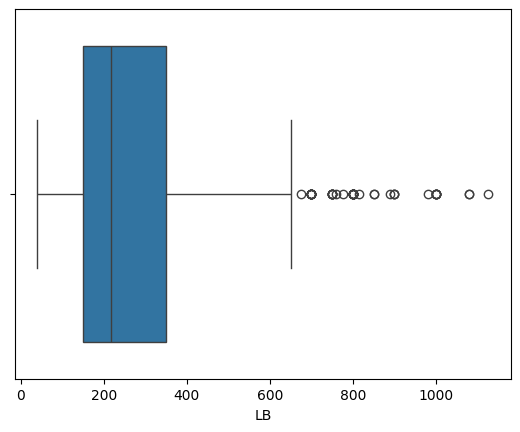

In [14]:
import seaborn as sns

sns.boxplot(x='LB', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the LB attribute are outliers

In [15]:
import numpy as np

q11,q31=np.percentile(df['LB'], [25,75])
s1 = q31-q11
ba1 = q31+(1.5*s1)
bw1 = q11-(1.5*s1)
print(q11)
print(q31)
print(s1)
print(ba1)
print(bw1)

150.0
350.0
200.0
650.0
-150.0


In [16]:
# shows outlier data on the LB attribute
dt1 = df[(df['LB']<bw1) | (df['LB']>ba1)]
dt1.head()

,LB,LT,KT,KM,GRS,HARGA
31,900,600,7,7,1,42000000000
50,850,600,7,7,0,41000000000
54,750,610,8,6,4,23000000000
102,800,1225,6,9,2,15000000000
103,800,752,6,4,0,30000000000


#### Identification of outlier attribute LT

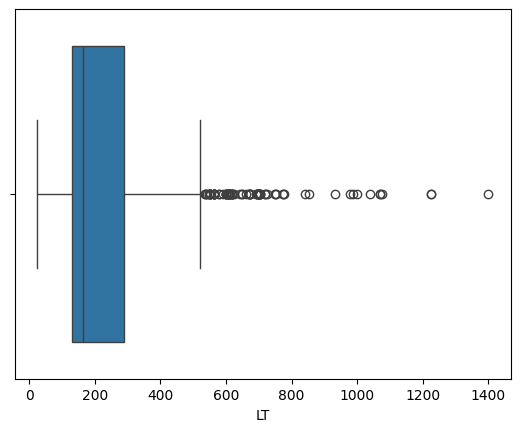

In [17]:
sns.boxplot(x='LT', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the LT attribute are outliers

In [18]:
q12,q32=np.percentile(df['LT'], [25,75])
s2 = q32-q12
ba2 = q32+(1.5*s2)
bw2 = q12-(1.5*s2)
print(q12)
print(q32)
print(s2)
print(ba2)
print(bw2)

130.0
290.0
160.0
530.0
-110.0


In [19]:
# shows outlier data on the LT attribute
dt2 = df[(df['LT']<bw2) | (df['LT']>ba2)]
dt2.head()

,LB,LT,KT,KM,GRS,HARGA
13,200,979,4,2,6,12500000000
20,300,700,8,5,2,14000000000
24,650,695,9,6,2,11000000000
31,900,600,7,7,1,42000000000
43,339,643,7,5,5,15000000000


#### Identification of outlier attribute KT

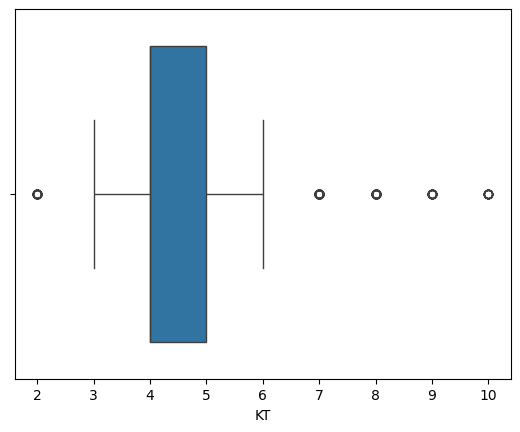

In [20]:
sns.boxplot(x='KT', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the KT attribute are outliers

In [21]:
q13,q33=np.percentile(df['KT'], [25,75])
s3 = q33-q13
ba3 = q33+(1.5*s3)
bw3 = q13-(1.5*s3)
print(q13)
print(q33)
print(s3)
print(ba3)
print(bw3)

4.0
5.0
1.0
6.5
2.5


In [22]:
# shows outlier data on the KT attribute
dt3 = df[(df['KT']<bw3) | (df['KT']>ba3)]
dt3.head()

,LB,LT,KT,KM,GRS,HARGA
3,40,25,2,2,0,430000000
20,300,700,8,5,2,14000000000
21,315,218,7,3,2,8000000000
22,75,75,2,3,0,700000000
24,650,695,9,6,2,11000000000


#### Identification of outlier attribute KM

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the KM attribute are outliers

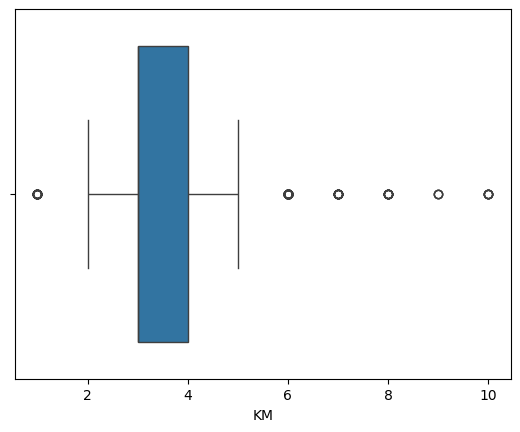

In [23]:
sns.boxplot(x='KM', data=df);

In [24]:
q14,q34=np.percentile(df['KM'], [25,75])
s4 = q34-q14
ba4 = q34+(1.5*s4)
bw4 = q14-(1.5*s4)
print(q14)
print(q34)
print(s4)
print(ba4)
print(bw4)

3.0
4.0
1.0
5.5
1.5


In [25]:
# shows outlier data on the KM attribute
dt4 = df[(df['KM']<bw4) | (df['KM']>ba4)]
dt4.head()

,LB,LT,KT,KM,GRS,HARGA
24,650,695,9,6,2,11000000000
31,900,600,7,7,1,42000000000
32,102,102,2,1,0,1100000000
34,145,200,8,8,1,3600000000
45,450,240,9,9,0,6000000000


#### Identification of outlier attribute GRS

<Axes: xlabel='GRS'>

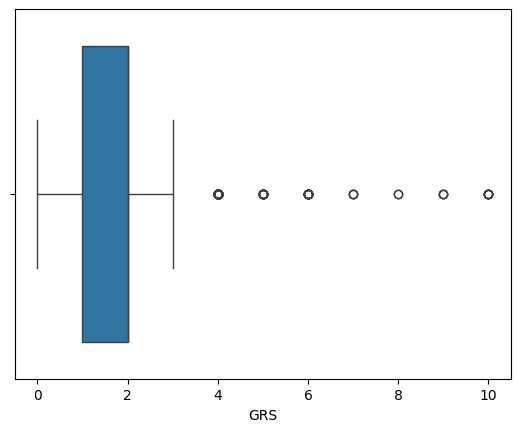

In [26]:
sns.boxplot(x='GRS', data=df)

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the GRS attribute are outliers

In [27]:
q15,q35=np.percentile(df['GRS'], [25,75])
s5 = q35-q15
ba5 = q35+(1.5*s5)
bw5 = q15-(1.5*s5)
print(q15)
print(q35)
print(s5)
print(ba5)
print(bw5)

1.0
2.0
1.0
3.5
-0.5


In [28]:
# shows outlier data on the GRS attribute
dt5 = df[(df['GRS']<bw5) | (df['GRS']>ba5)]
dt5.head()

,LB,LT,KT,KM,GRS,HARGA
2,267,250,4,4,4,3000000000
13,200,979,4,2,6,12500000000
19,450,248,5,5,4,9700000000
27,300,200,5,5,4,6500000000
43,339,643,7,5,5,15000000000


#### Identification of outlier attribute Harga

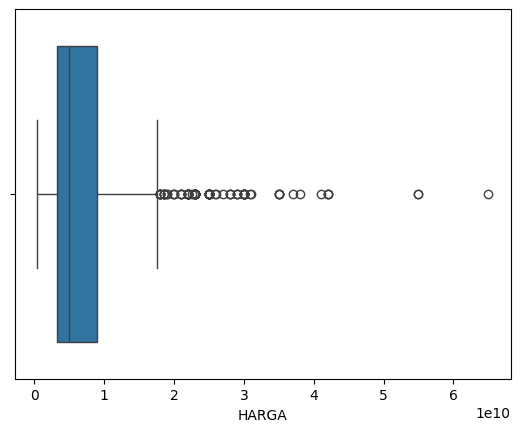

In [29]:
sns.boxplot(x='HARGA', data=df);

Look for Q1, Q3, upper limit, lower limit, difference between Q3 and Q1 to find which data on the Harga attribute are outliers

In [30]:
q16,q36=np.percentile(df['HARGA'], [25,75])
s6 = q36-q16
ba6 = q36+(1.5*s6)
bw6 = q16-(1.5*s6)
print(q16)
print(q36)
print(s6)
print(ba6)
print(bw6)

3262500000.0
9000000000.0
5737500000.0
17606250000.0
-5343750000.0


In [31]:
# shows outlier data on the Harga attribute
dt6 = df[(df['HARGA']<bw6) | (df['HARGA']>ba6)]
dt6.head()

,LB,LT,KT,KM,GRS,HARGA
18,200,251,5,3,3,18000000000
31,900,600,7,7,1,42000000000
50,850,600,7,7,0,41000000000
54,750,610,8,6,4,23000000000
61,300,410,5,3,0,18000000000


### Data distribution

#### Distribution of data from attribute LB

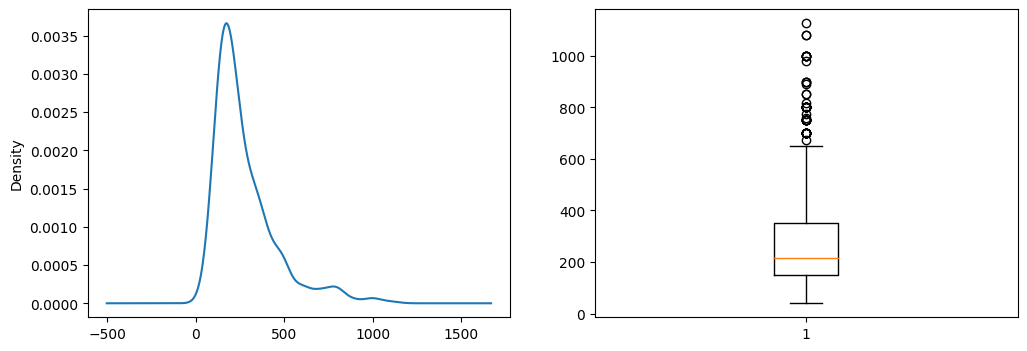

In [32]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LB'].plot(kind='kde')

f.add_subplot(1,2,2 )
plt.boxplot(df['LB'])

plt.show()

- Shows that most of the Building Area is at 200
- Data has many outliers

#### Distribution of data from attribute LT

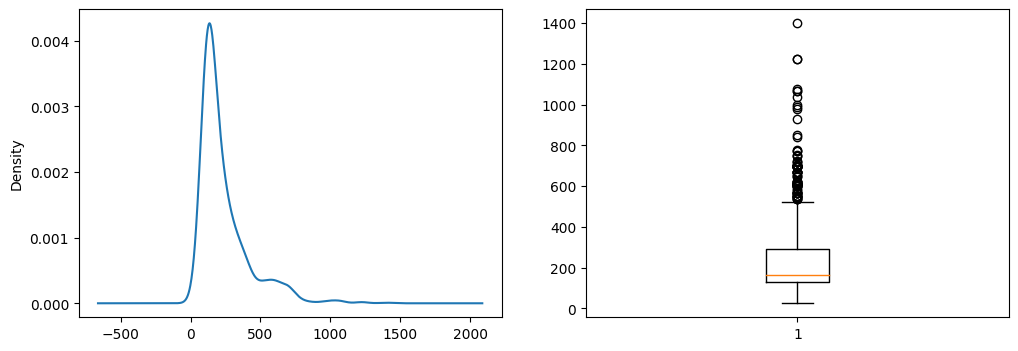

In [33]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['LT'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['LT'])

plt.show()

- shows that most of the Land Area is in the number 200
- Data has many outliers

#### Distribution of data from attribute KT

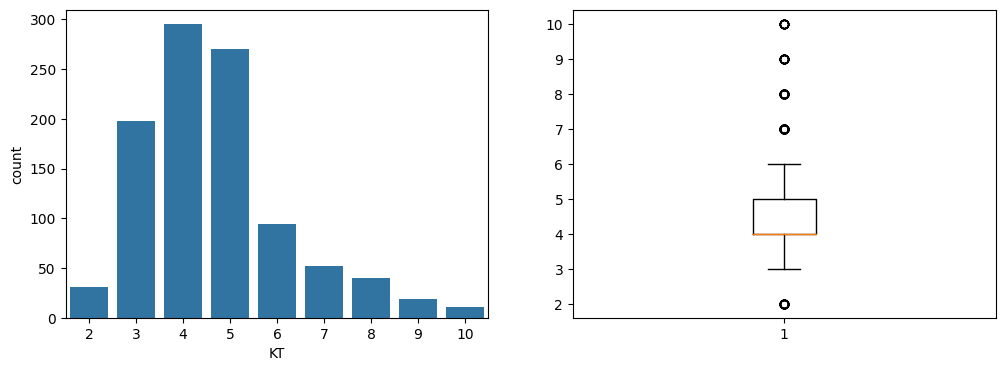

In [34]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KT'])

f.add_subplot(1,2,2)
plt.boxplot(df['KT'])

plt.show()

- Shows that most of the Number of Bedrooms is 4 and 5
- Data has few outliers

#### Distribution of data from attribute KM

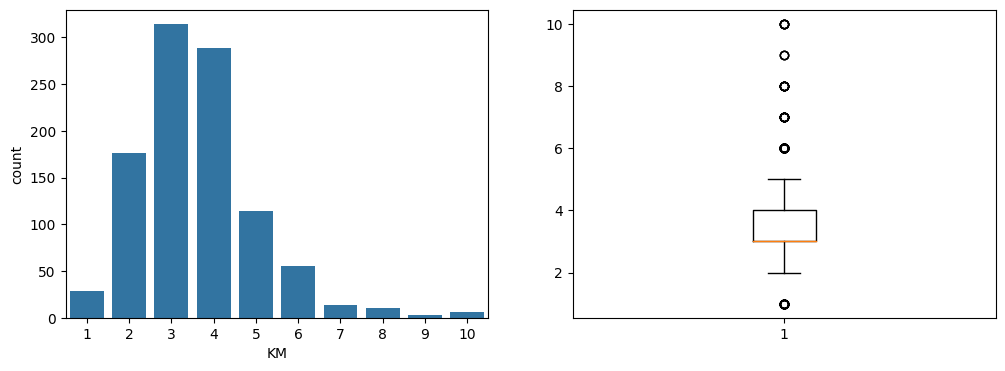

In [35]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['KM'])

f.add_subplot(1,2,2)
plt.boxplot(df['KM'])

plt.show()

- Shows that most of the Number of Bathrooms is 4 and 5
- Data has few outliers

#### Distribution of data from attribute GRS

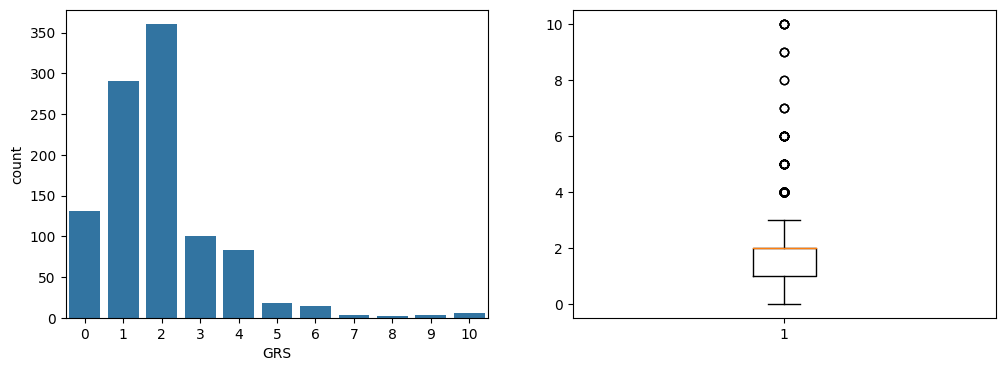

In [36]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(x=df['GRS'])

f.add_subplot(1,2,2)
plt.boxplot(df['GRS'])

plt.show();

- Shows that most of the Total Garage Capacity is 1 and 2 cars
- Data has few outliers

#### Distribution of data from attribute Harga

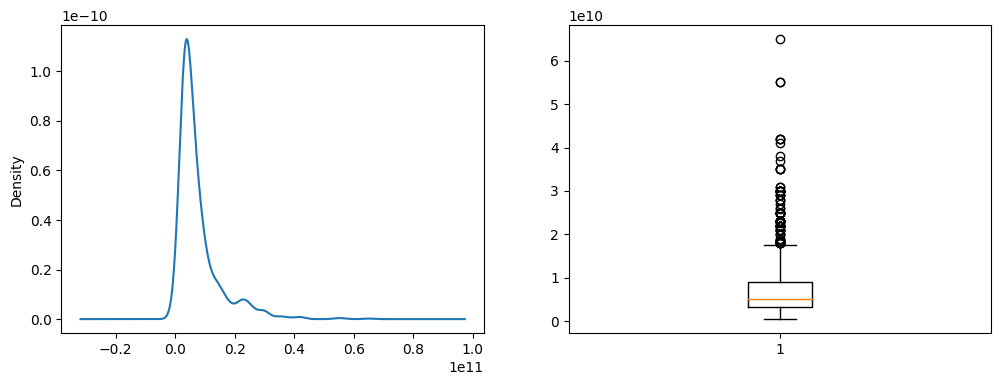

In [37]:
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['HARGA'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['HARGA'])

plt.show()

### Correlation between independent and dependent variable

<Figure size 1000x800 with 0 Axes>

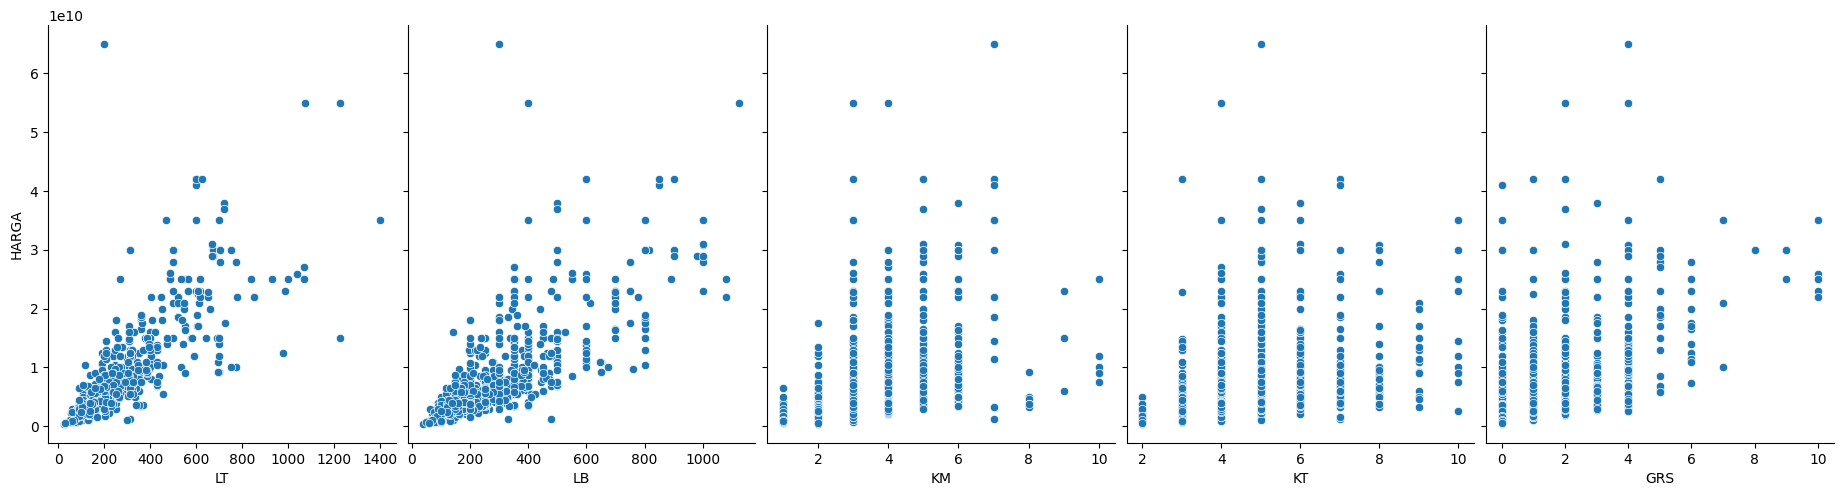

In [38]:
# Bivariate analysis between independent variables and dependent variables
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['LT', 'LB', 'KM', 'KT', 'GRS'], y_vars=['HARGA'], size=5, aspect=0.75)
plt.show()

In [39]:
# correlation of independent variable and dependent variable
df.corr().style.background_gradient().set_precision(1)

,LB,LT,KT,KM,GRS,HARGA
LB,1.0,0.7,0.4,0.5,0.5,0.7
LT,0.7,1.0,0.4,0.4,0.5,0.8
KT,0.4,0.4,1.0,0.7,0.3,0.3
KM,0.5,0.4,0.7,1.0,0.3,0.4
GRS,0.5,0.5,0.3,0.3,1.0,0.5
HARGA,0.7,0.8,0.3,0.4,0.5,1.0


## Classic assumption test

In [40]:
x = df.drop(columns=['HARGA'])
y = df['HARGA']

In [54]:
import statsmodels.api as sm

model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  HARGA   R-squared (uncentered):               -2754.039
Model:                            OLS   Adj. R-squared (uncentered):          -2767.745
Method:                 Least Squares   F-statistic:                             -200.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):                        1.00
Time:                        04:45:21   Log-Likelihood:                         -23742.
No. Observations:                1010   AIC:                                  4.749e+04
Df Residuals:                    1005   BIC:                                  4.752e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LB          1.232e+07   1.14e+06     10.812      0.000    1.01e+07    1.46e+07
LT          2.375e+07   1.06e+06     22.302      0.000    2.17e+07    2.58e+07
KT         -7.242e+08   9.33e+07     -7.761      0.000   -9.07e+08   -5.41e+08
KM          4.091e+08   1.24e+08      3.292      0.001    1.65e+08    6.53e+08
GRS         2.908e+08   9.61e+07      3.025      0.003    1.02e+08    4.79e+08
==============================================================================
Omnibus:                      922.378   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            99625.072
Skew:                           3.708   Prob(JB):                         0.00
Kurtosis:                      51.087   Cond. No.                         523.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# adding a constant variable
X=sm.add_constant(x)
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HARGA   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     506.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.25e-271
Time:                        04:48:33   Log-Likelihood:                -23740.
No. Observations:                1010   AIC:                         4.749e+04
Df Residuals:                    1004   BIC:                         4.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.417e+08      4e+08     -1.856      0.064   -1.53e+09    4.27e+07
LB          1.232e+07   1.14e+06     10.824      0.000    1.01e+07    1.46e+07
LT          2.366e+07   1.06e+06     22.221      0.000    2.16e+07    2.57e+07
KT         -6.195e+08   1.09e+08     -5.686      0.000   -8.33e+08   -4.06e+08
KM          4.555e+08   1.27e+08      3.598      0.000    2.07e+08    7.04e+08
GRS           3.1e+08   9.66e+07      3.209      0.001     1.2e+08    4.99e+08
==============================================================================
Omnibus:                      908.406   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98134.485
Skew:                           3.611   Prob(JB):                         0.00
Kurtosis:                      50.747   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Normality test

In the normality test we use the Prob Jarque Bera (JB) value from the above test of 0.00. With the following hypothesis:

- Determine the Hypothesis
     - H0 : Residuals are normally distributed
     - H1 : Residuals are not normally distributed
- Significance level
     - ∝=5% (∝=0.05)
- Test Statistics
     - p-value = 0.00
- Critical area
     - Reject H0 if p-value < α
- Decision
     - Because the p-value is equal to 0.00, where the p-value < α is 0.00 < 0.05, then reject H0.
- Conclusion
     - In this dataset the data is not normally distributed

### Multicollinearity test

In [56]:
from patsy import dmatrices
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = smf.ols(formula = "HARGA~LB+LT+KT+KM+GRS", data = df).fit()
Y,X = dmatrices ("HARGA~LB+LT+KT+KM+GRS", data = df, return_type ="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
print(vif)

[10.500700619760497, 2.6902235160668386, 2.410290942259932, 1.9280243602936888, 2.122260472079954, 1.398235535323092]


Multicollinearity test to show whether there is a correlation between the independent variables in multiple linear regression.
- Determine the Hypothesis
     - H0 : VIF < 10 means there is no multicollinearity.
     - H1 : VIF > 10 means that there is multicollinearity.
- Significance level
     - ∝=5% (∝=0.05)
- Test Statistics
     - VIF :
     - Constant = 10,500
     -LB = 2,690
     - LT = 2,410
     - KT = 1,928
     - Miles = 2,122
     - GRS = 2,122
- Critical Area
     - Reject H0 if VIF > ∝
- Decision
     - Because the VIF value (LB = 2,690, LT = 2,410, KT = 1,928, KM = 2,122, and GRS = 2,122) < α then fails to Reject H0
- Conclusion
     - So, the data set does not have multicollinearity

### Heteroscedasticity test

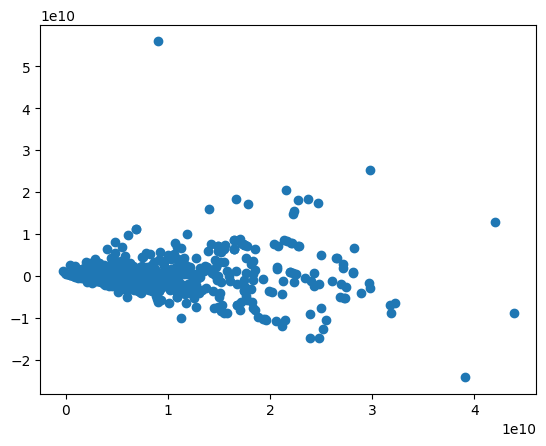

In [57]:
lm=smf.ols(formula="HARGA~LB+LT+KT+KM+GRS",data=df).fit()
lm
resid=lm.resid
plt.scatter(lm.predict(),resid)

In [58]:
import statsmodels.stats as stats

stats.diagnostic.het_white(resid, lm.model.exog)

(137.16019937750292,
 1.7462172530240334e-19,
 7.770694982493103,
 4.274750011791549e-21)

Based on the results of the heteroscedasticity test, it can be seen that the dots have no clear shape. And the scatter points above and below the number 0 on the Y axis. So it can be concluded that there is no heteroscedasticity problem in the regression model.

## Partial test

Partial test is used to determine whether the independent variable (X) has a significant (real) impact on the dependent variable (Y). From the data above, the p-value (Constant) is 0.064, the value (LB) is 0.000, the value (LT) is 0.000, the value (KT) is 0.000, the value (KM) is 0.000, and the value (GRS) is 0.001.
Here's the hypothesis:
- Hypothesis
     - H0 : βi = 0, i = 0,1,2 (There is no significant effect between X and Y)
     - H1 : βi ≠ 0, i = 0,1,2 (There is a significant effect between X and Y)
- Significance level
     - ∝=5% = 0.05
- Critical area
     - If p-value ≤ ∝ (0.05) → Reject H0
     - P-value : = 0.001 and = 0.000 ; ∝= 0.05
- Decision
     - Because the p-value for β1, β2, β3, β4, β5 < ∝ then reject
- Conclusion
     - In the dataset there is a significant influence between variable X (LB, LT, KT, KM, GRS) and variable Y (Harga).

## Modelling

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4)
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((606, 5), (404, 5), (606,), (404,))

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [60]:
# shows the value of the slope/coefficient) and intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[ 1.05741763e+07  2.56909842e+07 -6.26072834e+08  4.28022537e+08
  2.64833032e+08]
-482584002.8724966


In [61]:
coef_dict = {
    'features':x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns = ['features', 'coef_value'])
coef

,features,coef_value
0,LB,1.057418e+07
1,LT,2.569098e+07
2,KT,-6.260728e+08
3,KM,4.280225e+08
4,GRS,2.648330e+08


from matplotlib import pyplot as plt
coef['coef_value'].plot(kind='hist', bins=20, title='coef_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
coef.groupby('features').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
coef['coef_value'].plot(kind='line', figsize=(8, 4), title='coef_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(coef['features'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(coef, x='coef_value', y='features', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

- from the above values, if put into the formula it becomes: Y = 1.057*1 + 2.569*2 + (-6.260)*3 + 4.280*4 + 2.648*5 + -482584002

In [62]:
y_pred = lin_reg.predict(X_test)
print("Accuracy %.2f%%" % (lin_reg.score(X_test, y_test)*100))

Accuracy 65.64%


### Case study

- Samuel wants to find a criteria house in DKI Jakarta with the following criteria:
     1. Building Area (LB) = 100
     2. Land Area (LT) = 300
     3. Number of Bedrooms = 3
     4. Number of Bathrooms = 2
     5. Car capacity in garage (GRS) = 1

In [63]:
import math

print("Samuel's dream house costs approx IDR {:,} million".format(math.floor(lin_reg.predict([[100, 300, 3, 2, 1]])/1000000)))

Samuel's dream house costs approx IDR 7,524 million


# Result

After conducting the linear regression experiment on house price forecasting in Jakarta and Tebet, we obtained a prediction accuracy of 65.64%. While this result indicates that our model is able to make reasonably accurate predictions, there is certainly room for improvement. Further analysis of the data and refinement of the model could potentially increase the accuracy of our forecasts. Nonetheless, this experiment provides valuable insights into the factors that impact house prices in these areas and demonstrates the utility of linear regression as a tool for analyzing real estate market trends.

# Conclusion

In conclusion, the linear regression experiment on house price forecasting in Jakarta and Tebet has demonstrated the effectiveness of this method for analyzing real estate market trends and making predictions about future prices. While the accuracy of our model was 65.64%, there is still potential for improvement through further refinement of the dataset and the model itself.

One recommendation for future experiments is to normalize the dataset before conducting the analysis. Normalization can improve the accuracy of the model by scaling the variables and ensuring that they have the same range and distribution. Additionally, it may be beneficial to explore additional factors that could impact house prices in Jakarta and Tebet, such as economic indicators and demographic data.

Overall, this experiment has provided valuable insights into the housing markets of Jakarta and Tebet and highlights the potential of linear regression for real estate forecasting. By continuing to refine and improve upon this method, researchers and industry professionals can gain a better understanding of market trends and make more accurate predictions about future prices.